In [1]:
from fastai.vision import *
from fastai import*
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# to create path objects
from pathlib import Path
from pathlib import Path
#import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pandas as pd
import numpy as np

In [2]:
#create path to relevant files and folders.
PATH = Path('pothole_detection_data/simplex_set')
path_content = list(PATH.iterdir())
path_content

[PosixPath('pothole_detection_data/simplex_set/test_negative'),
 PosixPath('pothole_detection_data/simplex_set/test_positive'),
 PosixPath('pothole_detection_data/simplex_set/train_negative_ziptype8'),
 PosixPath('pothole_detection_data/simplex_set/train_positive_negative_merged1'),
 PosixPath('pothole_detection_data/simplex_set/pothole_detector_learner_saved'),
 PosixPath('pothole_detection_data/simplex_set/temp_classifier_csv'),
 PosixPath('pothole_detection_data/simplex_set/.ipynb_checkpoints'),
 PosixPath('pothole_detection_data/simplex_set/test_50_positive'),
 PosixPath('pothole_detection_data/simplex_set/Untitled1.ipynb'),
 PosixPath('pothole_detection_data/simplex_set/train_negative_ziptype9'),
 PosixPath('pothole_detection_data/simplex_set/learner_record_40_epochs.csv'),
 PosixPath('pothole_detection_data/simplex_set/train_positive_type9.zip'),
 PosixPath('pothole_detection_data/simplex_set/train_positive'),
 PosixPath('pothole_detection_data/simplex_set/simpleTestFullSizeAllPo

In [3]:
train_img_pos = PATH/'train_positive'
train_img_neg = PATH/'train_negative'
train_img_merged = PATH/'train_positive_negative_merged'
train_anno_file = PATH/'simpleTrainFullPhotosSortedFullAnnotations.txt'

#test set
test_anno_file = PATH/'simpleTestFullSizeAllPotholesSortedFullAnnotation.txt'
test_img_pos = PATH/'test_positive'
test_img_neg = PATH/'test_negative'

In [4]:
train_img_pos, train_img_neg, test_img_pos, test_img_neg, train_anno_file, test_anno_file, train_img_merged

(PosixPath('pothole_detection_data/simplex_set/train_positive'),
 PosixPath('pothole_detection_data/simplex_set/train_negative'),
 PosixPath('pothole_detection_data/simplex_set/test_positive'),
 PosixPath('pothole_detection_data/simplex_set/test_negative'),
 PosixPath('pothole_detection_data/simplex_set/simpleTrainFullPhotosSortedFullAnnotations.txt'),
 PosixPath('pothole_detection_data/simplex_set/simpleTestFullSizeAllPotholesSortedFullAnnotation.txt'),
 PosixPath('pothole_detection_data/simplex_set/train_positive_negative_merged'))

In [5]:
#extract out the training annotation file
train_anno_file = PATH/'simpleTrainFullPhotosSortedFullAnnotations.txt'
train_anno_file

PosixPath('pothole_detection_data/simplex_set/simpleTrainFullPhotosSortedFullAnnotations.txt')

In [6]:
train_anno_df = pd.read_csv(train_anno_file, header=None, delimiter=' ').fillna(0)
train_anno_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Train,data\Positive,data\G0010033.bmp,6,1990,1406,66,14,1464.0,1442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Train,data\Positive,data\G0010034.bmp,5,1804,1424,90,16,1192.0,1484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Train,data\Positive,data\G0010035.bmp,4,1590,1452,106,24,840.0,1544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Train,data\Positive,data\G0010036.bmp,3,1322,1516,134,28,362.0,1658.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Train,data\Positive,data\G0010037.bmp,2,884,1638,190,52,1428.0,1654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_anno_df_temp = train_anno_df.copy()
start6 = 6
start7 = 7
for i in range(14):
  train_anno_df_temp[start6] = train_anno_df_temp[start6-2] + train_anno_df_temp[start6]
  train_anno_df_temp[start7] = train_anno_df_temp[start7-2] - train_anno_df_temp[start7]
  start6+=4
  start7+=4
  
train_anno_df_temp.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Train,data\Positive,data\G0010033.bmp,6,1990,1406,2056,1392,1464.0,1442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Train,data\Positive,data\G0010034.bmp,5,1804,1424,1894,1408,1192.0,1484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Train,data\Positive,data\G0010035.bmp,4,1590,1452,1696,1428,840.0,1544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Train,data\Positive,data\G0010036.bmp,3,1322,1516,1456,1488,362.0,1658.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Train,data\Positive,data\G0010037.bmp,2,884,1638,1074,1586,1428.0,1654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_anno_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Train,data\Positive,data\G0010033.bmp,6,1990,1406,66,14,1464.0,1442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Train,data\Positive,data\G0010034.bmp,5,1804,1424,90,16,1192.0,1484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Train,data\Positive,data\G0010035.bmp,4,1590,1452,106,24,840.0,1544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#function to extract the upper left and lower right coord of the largest bbx
def find_largest_bbx(row):
  bbx_sizes = []
  bbx_coords = []
  k = 0
  #for each bbx
  for i in range(14):
    #append the size of each bbx
    bbx_sizes.append(row[k+6]*row[k+7])
    #append the upper left and lower right coord of each bbx
    bbx_coords.append([row[k+5], row[k+4], row[k+5]+row[k+7], row[k+6]+row[k+4]])
    #bbx_coords.append([row[k+5], row[k+4], row[k+5]+row[k+7]+200, row[k+6]+row[k+4]+200]) --- padded
    k+=4
  #find the index the max sized bbx, then use the index to find the coord of the bbx   
  return bbx_coords[bbx_sizes.index(max(bbx_sizes))]

In [10]:
#collect the list of all largest bbx for each positive image
bbx_largest = []
for i in range(train_anno_df.shape[0]):
  #bbx_largest.append(find_largest_bbx(train_anno_df.iloc[i]))
  #bbx_largest.append([find_largest_bbx(train_anno_df.iloc[i])])
  bbx_largest.append([[find_largest_bbx(train_anno_df.iloc[i])], ['positive']])
  
print(len(bbx_largest))
bbx_largest[:5]

1661


[[[[1434.0, 558.0, 1450.0, 660.0]], ['positive']],
 [[[1494.0, 566.0, 1516.0, 672.0]], ['positive']],
 [[[1576.0, 136.0, 1606.0, 274.0]], ['positive']],
 [[[1658.0, 362.0, 1696.0, 518.0]], ['positive']],
 [[[1638, 884, 1690, 1074]], ['positive']]]

In [11]:
#create a df of image names and largest bbx coordinates for the positive images
bbx_model_largest_pos = pd.DataFrame({'image_ids':train_anno_df_temp[2], 
                                      'bbx_coords_largest':bbx_largest, 
                                      })

#slice out the image id and replace the extension with JPG. This is to make the image names consistent with those in the image folders
bbx_model_largest_pos['image_ids'] = bbx_model_largest_pos.image_ids.apply(lambda x: x[5:13]+'.JPG')
print(bbx_model_largest_pos.shape)
bbx_model_largest_pos.head()

(1661, 2)


,image_ids,bbx_coords_largest
0,G0010033.JPG,"[[[1434.0, 558.0, 1450.0, 660.0]], [positive]]"
1,G0010034.JPG,"[[[1494.0, 566.0, 1516.0, 672.0]], [positive]]"
2,G0010035.JPG,"[[[1576.0, 136.0, 1606.0, 274.0]], [positive]]"
3,G0010036.JPG,"[[[1658.0, 362.0, 1696.0, 518.0]], [positive]]"
4,G0010037.JPG,"[[[1638, 884, 1690, 1074]], [positive]]"


In [12]:
#slice out the negative image ids
img_ids_neg = [str(p)[-12:] for p in list(train_img_neg.iterdir())]
img_ids_neg[:5]

['G0040992.JPG',
 'G0066220.JPG',
 'G0027474.JPG',
 'G0067253.JPG',
 'G0029895.JPG']

In [13]:
bbx_coords_neg = []
#each coord will be an array of elements  
for i in range(len(img_ids_neg)):
  #bbx_coords_neg.append([0,0,0,0])
  #bbx_coords_neg.append([0,0,0,0])
  bbx_coords_neg.append([[[0,0,0,0]], ['negative']])
  
bbx_coords_neg[:5]

[[[[0, 0, 0, 0]], ['negative']],
 [[[0, 0, 0, 0]], ['negative']],
 [[[0, 0, 0, 0]], ['negative']],
 [[[0, 0, 0, 0]], ['negative']],
 [[[0, 0, 0, 0]], ['negative']]]

In [14]:
len(bbx_coords_neg)

2751

In [15]:
#create a temporary df off the negative image id and coords
bbx_model_neg = pd.DataFrame({'image_ids':img_ids_neg, 
                              'bbx_coords_largest':bbx_coords_neg, 
                              })
print(bbx_model_neg.shape)
bbx_model_neg.head()

(2751, 2)


,image_ids,bbx_coords_largest
0,G0040992.JPG,"[[[0, 0, 0, 0]], [negative]]"
1,G0066220.JPG,"[[[0, 0, 0, 0]], [negative]]"
2,G0027474.JPG,"[[[0, 0, 0, 0]], [negative]]"
3,G0067253.JPG,"[[[0, 0, 0, 0]], [negative]]"
4,G0029895.JPG,"[[[0, 0, 0, 0]], [negative]]"


In [16]:
#concatenate bbx_model_pos and bbx_model_neg to create CSV file to be used for the bbx model the CSV file 
bbx_model_csv = bbx_model_largest_pos.append(bbx_model_neg, sort=False)
print(bbx_model_csv.shape)
bbx_model_csv.head()

(4412, 2)


,image_ids,bbx_coords_largest
0,G0010033.JPG,"[[[1434.0, 558.0, 1450.0, 660.0]], [positive]]"
1,G0010034.JPG,"[[[1494.0, 566.0, 1516.0, 672.0]], [positive]]"
2,G0010035.JPG,"[[[1576.0, 136.0, 1606.0, 274.0]], [positive]]"
3,G0010036.JPG,"[[[1658.0, 362.0, 1696.0, 518.0]], [positive]]"
4,G0010037.JPG,"[[[1638, 884, 1690, 1074]], [positive]]"


In [17]:
(PATH/'temp_bbx').mkdir(exist_ok=True)
BBX_CSV = PATH/'temp_bbx/bbx_csv.csv'

#write df to csv
bbx_model_csv.to_csv(BBX_CSV, index=False)

BBX_CSV.open().readlines()[:5]

['image_ids,bbx_coords_largest\n',
 'G0010033.JPG,"[[[1434.0, 558.0, 1450.0, 660.0]], [\'positive\']]"\n',
 'G0010034.JPG,"[[[1494.0, 566.0, 1516.0, 672.0]], [\'positive\']]"\n',
 'G0010035.JPG,"[[[1576.0, 136.0, 1606.0, 274.0]], [\'positive\']]"\n',
 'G0010036.JPG,"[[[1658.0, 362.0, 1696.0, 518.0]], [\'positive\']]"\n']

In [19]:
#images, lbl_bbox = bbx_model_largest_pos.image_ids, bbx_model_largest_pos.bbx_coords_largest
images, lbl_bbox = bbx_model_csv.image_ids, bbx_model_csv.bbx_coords_largest
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[str(o)[-12:]]
#get_y_func = lambda o:img2bbox[o]

In [20]:
#img2bbox[str('pothole_detection_data/simplex_set/train_positive_negative_merged/G0010033.JPG')[-12:]]

In [21]:
#data = (ObjectItemList.from_df(pd.DataFrame(data=list(img2bbox.keys())), path='pothole_detection_data/simplex_set/train_positive_negative_merged')
data = (ObjectItemList.from_folder('pothole_detection_data/simplex_set/train_positive_negative_merged')
        #Where are the images? -> in coco and its subfolders
        .split_by_rand_pct()                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func on the file name of the data
        .transform(get_transforms(), tfm_y=True)
        #Data augmentation? -> Standard transforms; also transform the label images
        .databunch(bs=8, collate_fn=bb_pad_collate))   
        #Finally we convert to a DataBunch, use a batch size of 16,
        # and we use bb_pad_collate to collate the data into a mini-batch

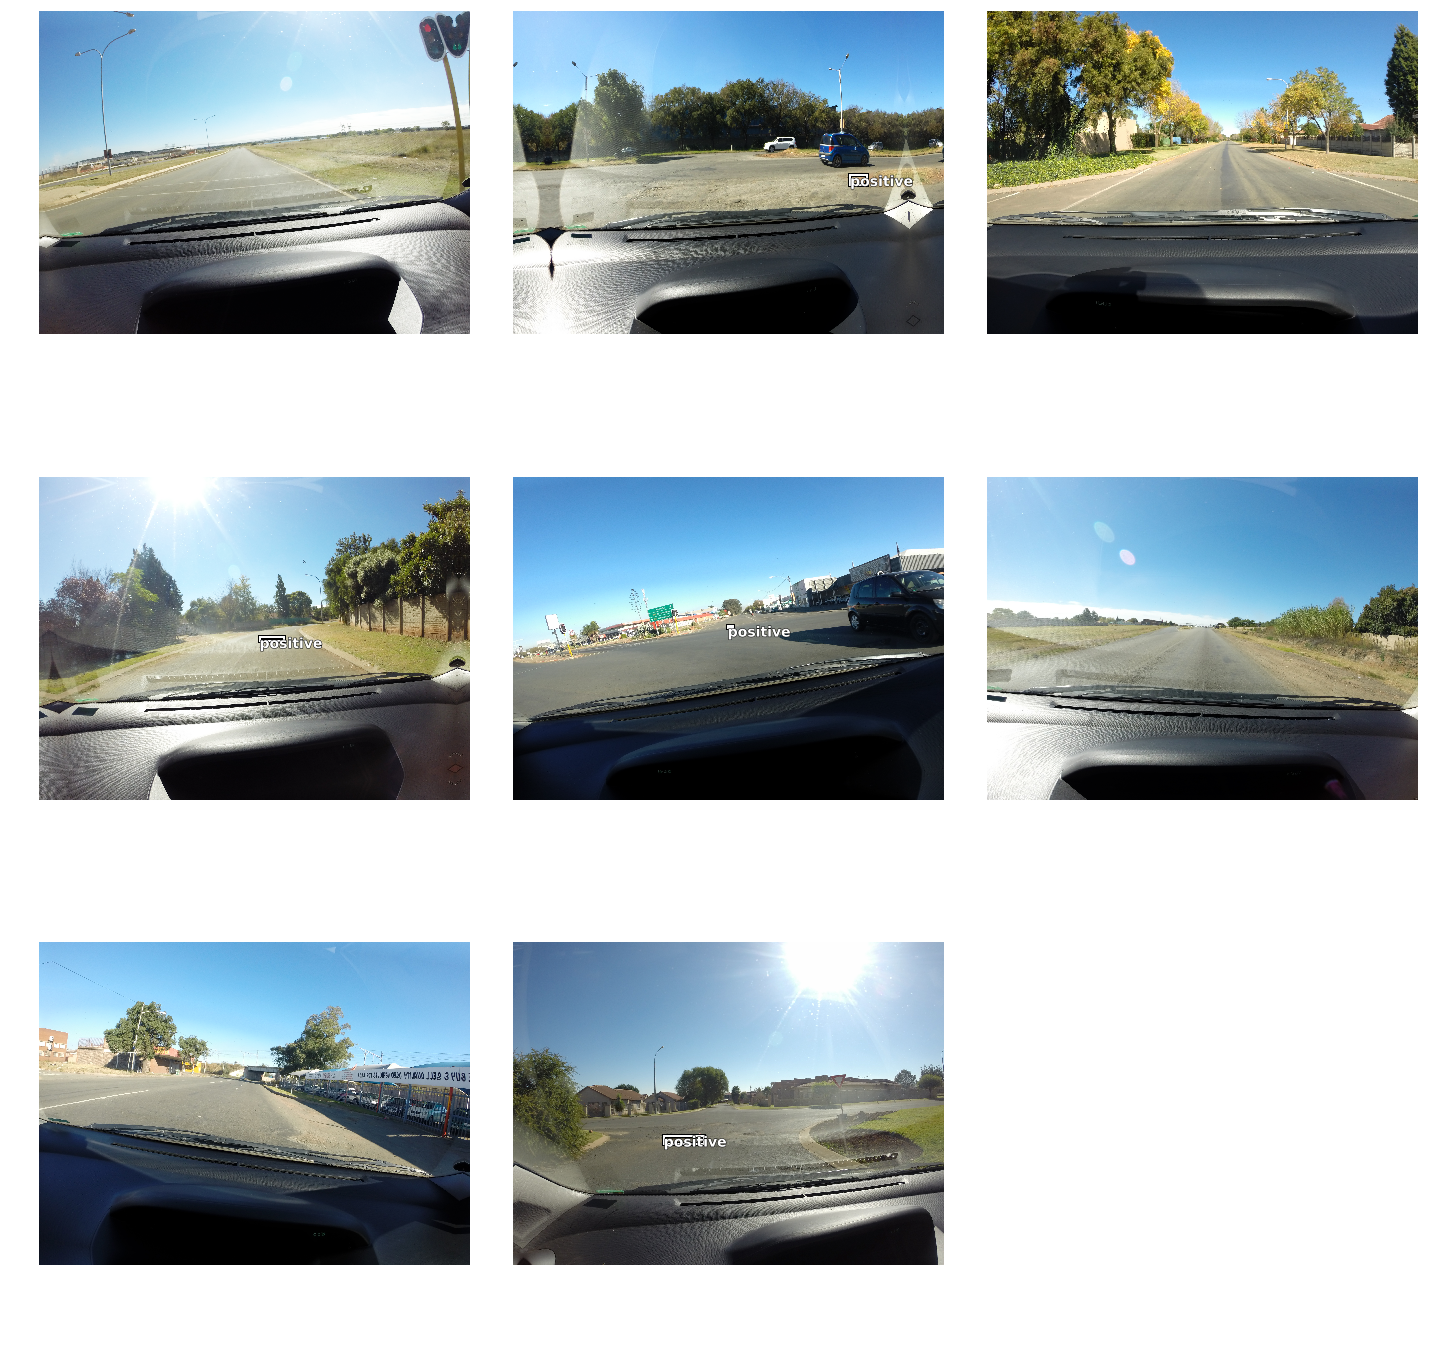

In [22]:
data.show_batch(rows=3, ds_type=DatasetType.Train, figsize=(20,20))

In [23]:
f_model = models.resnet34
sz = 224
bs = 8

In [24]:
#create a custom head that flatten out the last layer and match it to the number data classes
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = cnn_learner(data=data, base_arch=f_model, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

#learn.summary()

In [25]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 4.84 GiB (GPU 0; 7.43 GiB total capacity; 5.83 GiB already allocated; 276.94 MiB free; 855.51 MiB cached)

In [ ]:
#learn.recorder.plot(suggestion=True)